In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
path_p=r"/content/mail_data.csv"
df=pd.read_csv(path_p)

In [ ]:
data=df.where((pd.notnull(df)),'')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
df['Category']=enc.fit_transform(df['Category'])

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5157, 2)

In [ ]:
df['Category'].value_counts()
x = df['Message'].values.reshape(-1, 1)
y = df['Category']
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

print('Original dataset shape', Counter(y))

# fit predictor and target
x,y = ros.fit_resample(x, y)

print('Modified dataset shape', Counter(y))

Original dataset shape Counter({0: 4516, 1: 641})
Modified dataset shape Counter({0: 4516, 1: 4516})


In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import re

def extract_hyperlinks(text):

    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


    hyperlinks = re.findall(pattern, text)


    for link in hyperlinks:
        text = text.replace(link, f"'{link}'")

    return text

In [ ]:
import nltk
nltk.download('stopwords')
print(transform_text("I loved the lectures on Machine Learning. How about you?"))

love lectur machin learn


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(transform_text('I loved the lectures on Machine Learning. How about you?'))

love lectur machin learn


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df['transMessage'] = df['Message'].apply(transform_text)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transMessage']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape
Y = df['Category'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Read the CSV file
# data = pd.read_csv('/content/mail_data.csv')

# def preprocess_text(text):
#     # Remove non-alphabetic characters and lower the case
#     text = re.sub('[^a-zA-Z]', ' ', text).lower()
#     # Tokenize the text
#     words = text.split()
#     # Remove stopwords and apply stemming
#     stop_words = set(stopwords.words('english'))
#     stemmer = PorterStemmer()
#     words = [stemmer.stem(word) for word in words if word not in stop_words]
#     return ' '.join(words)

# # Map labels to binary (0 for 'ham', 1 for 'spam')
# data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# # Preprocessing: Convert text to numerical features using Bag-of-Words representation
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data['Message'])  # 'Message' is the column containing email bodies
# y = data['Category']  # 'Category' is the column containing the labels (0 for ham, 1 for spam)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define classifier
# clf = KNeighborsClassifier()

# # Flower Pollination Algorithm Parameters
# population_size = 20  # Number of flowers in the population
# max_iter = 50  # Maximum number of iterations
# p = 0.8  # Switch probability
# beta = 1  # Levy flight parameter
# epsilon = 1e-10  # Small value to avoid division by zero

# # Initialize population with random binary feature subsets
# population = np.random.randint(0, 2, size=(population_size, X.shape[1]))

# # Initialize best accuracy
# best_accuracy = 0
# best_subset = None

# # Main loop for the Flower Pollination Algorithm
# for iter in range(max_iter):
#     for i in range(population_size):
#         # Randomly select another flower
#         j = np.random.randint(0, population_size)

#         # Perform crossover
#         if np.random.rand() < p:
#             crossover_mask = np.random.randint(0, 2, size=X.shape[1]).astype(bool)
#             population[i, crossover_mask] = population[j, crossover_mask]

#         # Perform mutation
#         if np.random.rand() < p:
#             mutation_mask = np.random.rand(X.shape[1]) < 1 / (1 + np.exp(-beta))
#             population[i, mutation_mask] = 1 - population[i, mutation_mask]

#         # Evaluate the new feature subset using K-Nearest Neighbors
#         clf.fit(X_train[:, population[i] == 1], y_train)
#         y_pred = clf.predict(X_test[:, population[i] == 1])
#         accuracy = accuracy_score(y_test, y_pred)

#         # Update best accuracy and subset if necessary
#         if accuracy > best_accuracy:
#             best_accuracy = accuracy
#             best_subset = population[i].copy()

# # Print best accuracy and selected features
# if best_subset is not None:
#     selected_features = [vectorizer.get_feature_names_out()[idx] for idx, selected in enumerate(best_subset) if selected == 1]
#     print("Selected features:", selected_features)
#     print("Best accuracy:", best_accuracy)

# # Calculate and print confusion matrix
# clf.fit(X_train[:, best_subset == 1], y_train)
# y_pred = clf.predict(X_test[:, best_subset == 1])
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Print training and testing accuracy
# train_accuracy = accuracy_score(y_train, clf.predict(X_train[:, best_subset == 1]))
# print("Training Accuracy:", train_accuracy)
# print("Testing Accuracy:", best_accuracy)


Selected features: ['0089', '01223585236', '01223585334', '0207', '03', '0430', '05', '050703', '06', '07', '07090298926', '07123456789', '07732584351', '07734396839', '07753741225', '07786200117', '07801543489', '07808', '07821230901', '078498', '07880867867', '07973788240', '08', '0800', '08000776320', '08000930705', '08000938767', '08001950382', '08002986030', '08002986906', '08002988890', '08081560665', '0844', '08448350055', '08450542832', '08452810075over18', '0870', '08700469649', '08700621170150p', '08701417012', '08701752560', '087018728737', '0870241182716', '08702490080', '08704439680', '08704439680ts', '0870737910216yrs', '08707500020', '08708034412', '0871', '0871212025016', '087123002209am', '08712400602450p', '08712400603', '08712402902', '08712402972', '08712405020', '08712460324', '08712466669', '08714712394', '08715203649', '08715203652', '08715203677', '08715205273', '08717111821', '08717205546', '0871750', '08717507382', '08717890890', '08717898035', '08718720201', 

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Read the CSV file
data = pd.read_csv('/content/mail_data.csv')

def preprocess_text(text):
    # Remove non-alphabetic characters and lower the case
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Map labels to binary (0 for 'ham', 1 for 'spam')
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Preprocessing: Convert text to numerical features using Bag-of-Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])  # 'Message' is the column containing email bodies
y = data['Category']  # 'Category' is the column containing the labels (0 for ham, 1 for spam)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifier
clf = KNeighborsClassifier()

# Flower Pollination Algorithm Parameters
population_size = 5  # Number of flowers in the population
max_iter = 10  # Maximum number of iterations
p = 0.8  # Switch probability
beta = 1  # Levy flight parameter
epsilon = 1e-10  # Small value to avoid division by zero

# Initialize population with random binary feature subsets
population = np.random.randint(0, 2, size=(population_size, X.shape[1]))

# Initialize best accuracy
best_accuracy = 0
best_subset = None

# Main loop for the Flower Pollination Algorithm
for iter in range(max_iter):
    for i in range(population_size):
        # Randomly select another flower
        j = np.random.randint(0, population_size)

        # Perform crossover
        if np.random.rand() < p:
            crossover_mask = np.random.randint(0, 2, size=X.shape[1]).astype(bool)
            population[i, crossover_mask] = population[j, crossover_mask]

        # Perform mutation
        if np.random.rand() < p:
            mutation_mask = np.random.rand(X.shape[1]) < 1 / (1 + np.exp(-beta))
            population[i, mutation_mask] = 1 - population[i, mutation_mask]

        # Evaluate the new feature subset using K-Nearest Neighbors
        clf.fit(X_train[:, population[i] == 1], y_train)
        y_pred = clf.predict(X_test[:, population[i] == 1])
        accuracy = accuracy_score(y_test, y_pred)

        # Update best accuracy and subset if necessary
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_subset = population[i].copy()

# Print best accuracy and selected features
if best_subset is not None:
    selected_features = [vectorizer.get_feature_names_out()[idx] for idx, selected in enumerate(best_subset) if selected == 1]
    print("Selected features:", selected_features)
    print("Best accuracy:", best_accuracy)

# Calculate and print confusion matrix
clf.fit(X_train[:, best_subset == 1], y_train)
y_pred = clf.predict(X_test[:, best_subset == 1])
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print training and testing accuracy
train_accuracy = accuracy_score(y_train, clf.predict(X_train[:, best_subset == 1]))
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", best_accuracy)

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Selected features: ['000', '008704050406', '0089', '0121', '0125698789', '02085076972', '03', '05', '050703', '0578', '07046744435', '07090201529', '07742676969', '07753741225', '07781482378', '078', '07808247860', '07880867867', '0789xxxxxxx', '08', '08001950382', '08002888812', '08002988890', '08006344447', '0808', '08081560665', '08448350055', '08448714184', '08452810073', '08452810075over18', '08700435505150p', '08701237397', '08701417012', '08701417012150p', '0870241182716', '08702840625', '08704050406', '08704439680ts', '0870737910216yrs', '0870753331018', '08707808226', '08708034412', '08708800282', '08709501522', '0871', '087104711148', '08712300220', '08712317606', '08712402050', '08712402902', '08712402972', '08712405022', '08712460324', '08712466669', '08714712388', '08714712394', '08714712412', '08715203028', '08715203652', '08715203656', '08715203685', '08715705022', '08717111821', '08717205546', '0871750', '08717509990', '08717890890', '08717895698', '08718720201', '08718

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('/content/mail_data.csv')

# Text preprocessing function
def preprocess_text(text):
    # Remove non-alphabetic characters and lower the case
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Preprocessing: Convert text to numerical features using Bag-of-Words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])  # 'Message' is the column containing email bodies
y = data['Category']  # 'Category' is the column containing the labels (0 for ham, 1 for spam)

# Vectorize email bodies
X_vectorized = X.toarray()
n_features = X_vectorized.shape[1]
feature_names = vectorizer.get_feature_names_out()

# Define WOA parameters
population_size = 5
max_iter = 5
a_max = 2.0  # maximum scale parameter

# Initialize population
population = np.random.randint(0, 2, size=(population_size, n_features))  # Binary representation of feature subsets

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Define classifier
clf = KNeighborsClassifier()

# Initialize variable to store best accuracy
best_accuracy = 0
best_subset = None

# Initialize lists to store training and testing accuracies during each iteration
training_accuracies = []
testing_accuracies = []

# WOA
for iter in range(max_iter):
    a = a_max - iter * ((a_max - 0.5) / max_iter)  # Decreasing linearly from a_max to 0.5
    for i in range(population_size):
        # Update parameters
        r1 = np.random.rand(n_features)  # Random vector
        A = 2 * a * r1 - a  # Parameter A
        r2 = np.random.rand(n_features)  # Random vector
        C = 2 * r2  # Parameter C
        # Equation (2.3) in the original WOA paper
        D = np.abs(C * population[i] - X_train[np.random.randint(0, X_train.shape[0]), :])  # Distance to a randomly selected whale
        X_new = np.where(np.logical_or(D < A, np.logical_and(D >= A, C < 1)), 1, 0)  # Updated feature subset
        # Evaluate the new feature subset using KNN
        clf.fit(X_train[:, X_new == 1], y_train)
        y_train_pred = clf.predict(X_train[:, X_new == 1])
        y_test_pred = clf.predict(X_test[:, X_new == 1])
        # Calculate training and testing accuracies
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        # Store accuracies
        training_accuracies.append(train_accuracy)
        testing_accuracies.append(test_accuracy)
        # Update population
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_subset = X_new

# Print training and testing accuracies
print("Training accuracies:", training_accuracies)
print("Testing accuracies:", testing_accuracies)

# Print best accuracy and selected features
if best_subset is not None:
    selected_features = [feature_names[idx] for idx, selected in enumerate(best_subset) if selected == 1]
    print("Selected features:", selected_features)
    print("Best accuracy:", best_accuracy)

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Training accuracies: [0.9288759255104331, 0.929773390172762, 0.9286515593448508, 0.9270809961857752, 0.9299977563383441, 0.9261835315234462, 0.9299977563383441, 0.9302221225039264, 0.9311195871662553, 0.9279784608481041, 0.925959165357864, 0.9286515593448508, 0.9293246578415975, 0.925959165357864, 0.9270809961857752, 0.9295490240071798, 0.9268566300201929, 0.9286515593448508, 0.9255104330266996, 0.9299977563383441, 0.9266322638546107, 0.9313439533318375, 0.9295490240071798, 0.9360556428090644, 0.9266322638546107]
Testing accuracies: [0.9237668161434978, 0.9246636771300448, 0.9219730941704036, 0.9228699551569507, 0.9246636771300448, 0.9228699551569507, 0.9246636771300448, 0.9291479820627803, 0.9192825112107623, 0.9210762331838565, 0.9246636771300448, 0.9228699551569507, 0.9246636771300448, 0.9201793721973094, 0.9210762331838565, 0.9219730941704036, 0.9192825112107623, 0.9201793721973094, 0.9174887892376682, 0.9255605381165919, 0.9237668161434978, 0.9264573991031391, 0.9228699551569507, 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


class Particle:
    def __init__(self, dim):
        self.position = np.random.randint(2, size=dim)  # Initialize position randomly
        self.velocity = np.random.uniform(-1, 1, size=dim)  # Initialize velocity randomly
        self.best_position = self.position.copy()  # Initialize personal best position
        self.best_accuracy = float('-inf')  # Initialize personal best accuracy

class PSO:
    def __init__(self, n_particles, max_iterations, inertia_weight, cognitive_weight, social_weight):
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        self.inertia_weight = inertia_weight
        self.cognitive_weight = cognitive_weight
        self.social_weight = social_weight

    def fit(self, X, y):
        n_features = X.shape[1]
        self.particles = [Particle(n_features) for _ in range(self.n_particles)]  # Initialize particles randomly
        global_best_position = np.zeros(n_features)  # Initialize global best position
        global_best_accuracy = float('-inf')  # Initialize global best accuracy

        for t in range(self.max_iterations):
            for particle in self.particles:
                features = X.multiply(particle.position)  # Apply binary mask to features
                X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
                clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
                clf.fit(X_train, y_train)
                accuracy = accuracy_score(y_test, clf.predict(X_test))

                if accuracy > particle.best_accuracy:
                    particle.best_accuracy = accuracy
                    particle.best_position = particle.position.copy()

                if accuracy > global_best_accuracy:
                    global_best_accuracy = accuracy
                    global_best_position = particle.position.copy()

            for particle in self.particles:
                r1 = np.random.rand()
                r2 = np.random.rand()
                particle.velocity = (self.inertia_weight * particle.velocity +
                                     self.cognitive_weight * r1 * (particle.best_position - particle.position) +
                                     self.social_weight * r2 * (global_best_position - particle.position))
                particle.position = np.where(particle.velocity > 0.5, 1, 0)  # Apply binary threshold

        return global_best_position

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_particles = 5
max_iterations = 10
inertia_weight = 0.7
cognitive_weight = 1.5
social_weight = 1.5

# Initialize PSO algorithm
pso = PSO(n_particles, max_iterations, inertia_weight, cognitive_weight, social_weight)

# Extract features using PSO
best_features = pso.fit(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X.multiply(best_features), y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy using PSO Algorithm:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy using PSO Algorithm: 0.9479820627802691
Precision: 0.9174311926605505
Recall: 0.6711409395973155
F1 Score: 0.7751937984496124


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


# Grey Wolf Optimizer
def grey_wolf_optimizer(X, y, n_wolves, max_iterations):
    n_features = X.shape[1]
    wolves = np.random.rand(n_wolves, n_features)  # Initialize wolves' positions randomly

    accuracy = np.zeros(n_wolves)  # Initialize accuracy array

    for t in range(max_iterations):
        # Calculate a, A, and C
        a = 2 - 2 * t / max_iterations  # a decreases linearly from 2 to 0
        A = 2 * a * np.random.rand(n_wolves, n_features) - a  # A is a random number in [-a, a]
        C = 2 * np.random.rand(n_wolves, n_features)  # C is a random number in [0, 2]

        # Calculate distance between alpha, beta, and delta
        alpha_index = np.argmax(accuracy)  # Index of the alpha wolf (best accuracy)
        alpha_pos = wolves[alpha_index]
        beta_index = np.argsort(accuracy)[-2]  # Index of the beta wolf (second best accuracy)
        beta_pos = wolves[beta_index]
        delta_index = np.argsort(accuracy)[-3]  # Index of the delta wolf (third best accuracy)
        delta_pos = wolves[delta_index]

        # Update wolf positions
        for i in range(n_wolves):
            D_alpha = np.abs(C[i] * alpha_pos - wolves[i])  # Distance to alpha
            D_beta = np.abs(C[i] * beta_pos - wolves[i])  # Distance to beta
            D_delta = np.abs(C[i] * delta_pos - wolves[i])  # Distance to delta

            X1 = alpha_pos - A[i] * D_alpha  # Move towards alpha
            X2 = beta_pos - A[i] * D_beta  # Move towards beta
            X3 = delta_pos - A[i] * D_delta  # Move towards delta

            wolves[i] = (X1 + X2 + X3) / 3  # Update wolf position

            # Apply simple bounds
            wolves[i] = np.clip(wolves[i], 0, 1)

        # Evaluate fitness (accuracy) for each wolf
        for i in range(n_wolves):
            features = X.multiply(wolves[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy[i] = accuracy_score(y_test, y_pred)

    # Select the best wolf (highest accuracy)
    best_wolf_index = np.argmax(accuracy)
    best_wolf = wolves[best_wolf_index]
    best_features = X.multiply(best_wolf)  # Apply binary mask to best features
    return best_features

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_wolves = 5
max_iterations = 5

# Extract features using Grey Wolf Optimizer
best_features = grey_wolf_optimizer(X, y, n_wolves, max_iterations)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy using Grey Wolf Optimizer:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy using Grey Wolf Optimizer: 0.9273542600896861
Precision: 1.0
Recall: 0.4563758389261745
F1 Score: 0.6267281105990784


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def cuckoo_search_algorithm(X, y, n_cuckoos, max_iterations, pa):
    n_features = X.shape[1]
    cuckoos = np.random.randint(2, size=(n_cuckoos, n_features))
    fitness = np.zeros(n_cuckoos)

    for t in range(max_iterations):
        for i in range(n_cuckoos):
            features = X.multiply(cuckoos[i])
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)
            clf.fit(X_train, y_train)
            fitness[i] = clf.score(X_test, y_test)

        sorted_indices = np.argsort(fitness)[::-1]
        cuckoos = cuckoos[sorted_indices]
        fitness = fitness[sorted_indices]

        best_cuckoo = cuckoos[0]
        for i in range(1, n_cuckoos):
            step_size = np.random.normal(0, 1, size=n_features)
            step_size /= np.linalg.norm(step_size)
            levy_flight = 0.01 * step_size * (fitness[i] - fitness[0])

            new_cuckoo = cuckoos[i] + levy_flight
            new_cuckoo = np.clip(new_cuckoo, 0, 1)

            features = X.multiply(new_cuckoo)
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)
            clf.fit(X_train, y_train)
            fitness_new_cuckoo = clf.score(X_test, y_test)

            if fitness_new_cuckoo > fitness[i]:
                cuckoos[i] = new_cuckoo
                fitness[i] = fitness_new_cuckoo

        num_replaced = int(pa * n_cuckoos)
        replacement_indices = np.random.choice(range(num_replaced, n_cuckoos), size=num_replaced, replace=False)
        cuckoos[replacement_indices] = np.random.randint(2, size=(num_replaced, n_features))

    best_cuckoo = cuckoos[0]
    best_features = X.multiply(best_cuckoo)
    return best_features

# Assuming X is your feature matrix and y is your target variable
# Replace X and y with your actual dataset
# X should contain features and y should contain labels (0 for ham, 1 for spam)

# Example usage
X = data['Message']
y = data['Category']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

n_cuckoos = 5
max_iterations = 5
pa = 0.25

best_features = cuckoo_search_algorithm(X, y, n_cuckoos, max_iterations, pa)

X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy using Cuckoo Search Algorithm:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy using Cuckoo Search Algorithm: 0.9264573991031391
Precision: 1.0
Recall: 0.44966442953020136
F1 Score: 0.6203703703703703


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Grey Wolf Optimizer
def grey_wolf_optimizer(X, y, n_wolves, max_iterations):
    n_features = X.shape[1]
    wolves = np.random.rand(n_wolves, n_features)  # Initialize wolves' positions randomly

    accuracy = np.zeros(n_wolves)  # Initialize accuracy array

    for t in range(max_iterations):
        # Calculate a, A, and C
        a = 2 - 2 * t / max_iterations  # a decreases linearly from 2 to 0
        A = 2 * a * np.random.rand(n_wolves, n_features) - a  # A is a random number in [-a, a]
        C = 2 * np.random.rand(n_wolves, n_features)  # C is a random number in [0, 2]

        # Calculate distance between alpha, beta, and delta
        alpha_index = np.argmax(accuracy)  # Index of the alpha wolf (best accuracy)
        alpha_pos = wolves[alpha_index]
        beta_index = np.argsort(accuracy)[-2]  # Index of the beta wolf (second best accuracy)
        beta_pos = wolves[beta_index]
        delta_index = np.argsort(accuracy)[-3]  # Index of the delta wolf (third best accuracy)
        delta_pos = wolves[delta_index]

        # Update wolf positions
        for i in range(n_wolves):
            D_alpha = np.abs(C[i] * alpha_pos - wolves[i])  # Distance to alpha
            D_beta = np.abs(C[i] * beta_pos - wolves[i])  # Distance to beta
            D_delta = np.abs(C[i] * delta_pos - wolves[i])  # Distance to delta

            X1 = alpha_pos - A[i] * D_alpha  # Move towards alpha
            X2 = beta_pos - A[i] * D_beta  # Move towards beta
            X3 = delta_pos - A[i] * D_delta  # Move towards delta

            wolves[i] = (X1 + X2 + X3) / 3  # Update wolf position

            # Apply simple bounds
            wolves[i] = np.clip(wolves[i], 0, 1)

        # Evaluate fitness (accuracy) for each wolf
        for i in range(n_wolves):
            features = X.multiply(wolves[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)
            clf = SVC(kernel='linear', probability=True)  # SVM with linear kernel
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy[i] = accuracy_score(y_test, y_pred)

    # Select the best wolf (highest accuracy)
    best_wolf_index = np.argmax(accuracy)
    best_wolf = wolves[best_wolf_index]
    best_features = X.multiply(best_wolf)  # Apply binary mask to best features
    return best_features

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_wolves = 3
max_iterations = 5

# Extract features using Grey Wolf Optimizer
best_features = grey_wolf_optimizer(X, y, n_wolves, max_iterations)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.3, random_state=42)

# Train SVM classifier
clf = SVC(kernel='linear', probability=True)  # SVM with linear kernel
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy using Grey Wolf Optimizer:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy using Grey Wolf Optimizer: 0.9820574162679426
Precision: 1.0
Recall: 0.8660714285714286
F1 Score: 0.9282296650717704


NOW TRYING ALL THE HYBRID VERSIONS

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Flower Pollination Algorithm
def flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best):
    n_features = X.shape[1]
    flowers = np.random.randint(2, size=(n_flowers, n_features))  # Initialize flowers randomly
    fitness = np.zeros(n_flowers)

    for gen in range(max_generations):
        # Evaluate fitness for each flower
        for i in range(n_flowers):
            features = X.multiply(flowers[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort flowers by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        flowers = flowers[sorted_indices]
        fitness = fitness[sorted_indices]

        # Pollination
        for i in range(n_best, n_flowers):
            for j in range(n_features):
                if np.random.uniform() < 0.5:
                    flowers[i, j] = flowers[np.random.randint(n_best), j]

    # Select the best flower
    best_flower = flowers[0]
    best_features = X.multiply(best_flower)  # Apply binary mask to best features
    return best_features

# Whale Optimization Algorithm
def whale_optimization_algorithm(X, y, n_whales, max_iterations, n_best):
    n_features = X.shape[1]
    whales = np.random.randint(2, size=(n_whales, n_features))  # Initialize whales randomly
    fitness = np.zeros(n_whales)

    a = 2  # Parameter a (linearly decreases from 2 to 0 over iterations)
    for t in range(max_iterations):
        A = 2 * a * np.random.rand(n_whales, n_features) - a  # Parameter A
        C = 2 * np.random.rand(n_whales, n_features)  # Parameter C
        p = np.random.rand()  # Parameter p

        for i in range(n_whales):
            if np.random.rand() < p:  # Update based on the best whale
                D = np.abs(C[i] * whales[n_best] - whales[i])
            else:  # Update based on random whale
                rand_whale_index = np.random.randint(n_whales)
                D = np.abs(C[i] * whales[rand_whale_index] - whales[i])

            whales[i] = whales[i] + A[i] * D

            # Ensure feasibility of solutions (binary encoding)
            whales[i] = np.clip(whales[i], 0, 1)

            # Evaluate fitness for each whale
            features = X.multiply(whales[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort whales by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        whales = whales[sorted_indices]
        fitness = fitness[sorted_indices]

        # Update parameter a
        a = 2 - t * (2 / max_iterations)

    # Select the best whale
    best_whale = whales[0]
    best_features = X.multiply(best_whale)  # Apply binary mask to best features
    return best_features

# Hybrid Algorithm
def hybrid_algorithm(X, y, n_flowers, n_whales, max_generations, max_iterations):
    # Extract features using FPA
    features_fpa = flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best=10)

    # Extract features using WOA
    features_woa = whale_optimization_algorithm(X, y, n_whales, max_iterations, n_best=10)

    # Combine features from both algorithms
    combined_features = features_fpa + features_woa

    return combined_features

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_flowers = 15
n_whales = 15
max_generations = 10
max_iterations = 10

# Extract features using hybrid algorithm
best_features = hybrid_algorithm(X, y, n_flowers, n_whales, max_generations, max_iterations)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Hybrid Algorithm:", accuracy)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate overall accuracy, precision, recall, and F1 score
overall_report = classification_report(y_test, y_pred, output_dict=True)
overall_accuracy = overall_report['accuracy']
overall_precision = np.mean([overall_report['0']['precision'], overall_report['1']['precision']])
overall_recall = np.mean([overall_report['0']['recall'], overall_report['1']['recall']])
overall_f1 = np.mean([overall_report['0']['f1-score'], overall_report['1']['f1-score']])

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)


Accuracy using Hybrid Algorithm: 0.9318385650224216
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       1.00      0.49      0.66       149

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.81      1115
weighted avg       0.94      0.93      0.92      1115

Overall Accuracy: 0.9318385650224216
Overall Precision: 0.963531669865643
Overall Recall: 0.7449664429530202
Overall F1 Score: 0.8099045260399842


In [ ]:
# BAT+WOA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Bat Algorithm
def bat_algorithm(X, y, n_bats, max_iterations, f_min, f_max, alpha, gamma):
    n_features = X.shape[1]
    bats = np.random.randint(2, size=(n_bats, n_features))  # Initialize bats randomly
    fitness = np.zeros(n_bats)

    for t in range(max_iterations):
        # Update frequency for each bat
        frequency = f_min + (f_max - f_min) * np.random.rand(n_bats)

        # Update bats' positions
        for i in range(n_bats):
            new_bat = np.copy(bats[i])
            for j in range(n_features):
                if np.random.rand() > frequency[i]:
                    new_bat[j] = 1 if np.random.rand() < alpha else 0
                else:
                    new_bat[j] = new_bat[j] ^ 1 if np.random.rand() < gamma else new_bat[j]

            # Evaluate fitness for the new bat
            features = X.multiply(new_bat)  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness_new_bat = accuracy_score(y_test, y_pred)

            # Update bat if the new solution is better
            if fitness_new_bat > fitness[i]:
                bats[i] = new_bat
                fitness[i] = fitness_new_bat

    # Select the best bat
    best_bat_index = np.argmax(fitness)
    best_bat = bats[best_bat_index]
    best_features = X.multiply(best_bat)  # Apply binary mask to best features
    return best_features

# Whale Optimization Algorithm
def whale_optimization_algorithm(X, y, n_whales, max_iterations, n_best):
    n_features = X.shape[1]
    whales = np.random.randint(2, size=(n_whales, n_features))  # Initialize whales randomly
    fitness = np.zeros(n_whales)

    a = 2  # Parameter a (linearly decreases from 2 to 0 over iterations)
    for t in range(max_iterations):
        A = 2 * a * np.random.rand(n_whales, n_features) - a  # Parameter A
        C = 2 * np.random.rand(n_whales, n_features)  # Parameter C
        p = np.random.rand()  # Parameter p

        for i in range(n_whales):
            if np.random.rand() < p:  # Update based on the best whale
                D = np.abs(C[i] * whales[n_best] - whales[i])
            else:  # Update based on random whale
                rand_whale_index = np.random.randint(n_whales)
                D = np.abs(C[i] * whales[rand_whale_index] - whales[i])

            whales[i] = whales[i] + A[i] * D

            # Ensure feasibility of solutions (binary encoding)
            whales[i] = np.clip(whales[i], 0, 1)

            # Evaluate fitness for each whale
            features = X.multiply(whales[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort whales by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        whales = whales[sorted_indices]
        fitness = fitness[sorted_indices]

        # Update parameter a
        a = 2 - t * (2 / max_iterations)

    # Select the best whale
    best_whale = whales[0]
    best_features = X.multiply(best_whale)  # Apply binary mask to best features
    return best_features

# Hybrid Algorithm
def hybrid_algorithm(X, y, n_bats, n_whales, max_iterations_bat, max_iterations_whale):
    # Extract features using Bat Algorithm
    features_bat = bat_algorithm(X, y, n_bats, max_iterations_bat, f_min=0.1, f_max=0.9, alpha=0.5, gamma=0.1)

    # Extract features using Whale Optimization Algorithm
    features_whale = whale_optimization_algorithm(X, y, n_whales, max_iterations_whale, n_best=10)

    # Combine features from both algorithms
    combined_features = features_bat + features_whale

    return combined_features

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_bats = 15
n_whales = 15
max_iterations_bat = 10
max_iterations_whale = 10

# Extract features using hybrid algorithm
best_features = hybrid_algorithm(X, y, n_bats, n_whales, max_iterations_bat, max_iterations_whale)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate overall accuracy, precision, recall, and F1 score
overall_report = classification_report(y_test, y_pred, output_dict=True)
overall_accuracy = overall_report['accuracy']
overall_precision = np.mean([overall_report['0']['precision'], overall_report['1']['precision']])
overall_recall = np.mean([overall_report['0']['recall'], overall_report['1']['recall']])
overall_f1 = np.mean([overall_report['0']['f1-score'], overall_report['1']['f1-score']])

print("Overall Accuracy:", overall_accuracy)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.47      0.64       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115

Overall Accuracy: 0.9291479820627803
Overall Precision: 0.9622009569377991
Overall Recall: 0.7348993288590604
Overall F1 Score: 0.7999927340267796


In [ ]:
# BAT+FPA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Flower Pollination Algorithm
def flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best):
    n_features = X.shape[1]
    flowers = np.random.randint(2, size=(n_flowers, n_features))  # Initialize flowers randomly
    fitness = np.zeros(n_flowers)

    for gen in range(max_generations):
        # Evaluate fitness for each flower
        for i in range(n_flowers):
            features = X.multiply(flowers[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort flowers by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        flowers = flowers[sorted_indices]
        fitness = fitness[sorted_indices]

        # Pollination
        for i in range(n_best, n_flowers):
            for j in range(n_features):
                if np.random.uniform() < 0.5:
                    flowers[i, j] = flowers[np.random.randint(n_best), j]

    # Select the best flower
    best_flower = flowers[0]
    best_features = X.multiply(best_flower)  # Apply binary mask to best features
    return best_features

# Bat Algorithm
def bat_algorithm(X, y, n_bats, max_iterations, f_min, f_max, alpha, gamma):
    n_features = X.shape[1]
    bats = np.random.randint(2, size=(n_bats, n_features))  # Initialize bats randomly
    fitness = np.zeros(n_bats)

    for t in range(max_iterations):
        # Update frequency for each bat
        frequency = f_min + (f_max - f_min) * np.random.rand(n_bats)

        # Update bats' positions
        for i in range(n_bats):
            new_bat = np.copy(bats[i])
            for j in range(n_features):
                if np.random.rand() > frequency[i]:
                    new_bat[j] = 1 if np.random.rand() < alpha else 0
                else:
                    new_bat[j] = new_bat[j] ^ 1 if np.random.rand() < gamma else new_bat[j]

            # Evaluate fitness for the new bat
            features = X.multiply(new_bat)  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness_new_bat = accuracy_score(y_test, y_pred)

            # Update bat if the new solution is better
            if fitness_new_bat > fitness[i]:
                bats[i] = new_bat
                fitness[i] = fitness_new_bat

    # Select the best bat
    best_bat_index = np.argmax(fitness)
    best_bat = bats[best_bat_index]
    best_features = X.multiply(best_bat)  # Apply binary mask to best features
    return best_features

# Hybrid Algorithm
def hybrid_algorithm(X, y, n_flowers, n_bats, max_generations, max_iterations, n_best):
    # Extract features using Flower Pollination Algorithm
    features_fpa = flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best)

    # Extract features using Bat Algorithm
    features_bat = bat_algorithm(X, y, n_bats, max_iterations, f_min=0.1, f_max=0.9, alpha=0.5, gamma=0.1)

    # Combine features from both algorithms
    combined_features = features_fpa + features_bat

    return combined_features

# Assuming X is your feature matrix and y is your target variable
# Replace X and y with your actual dataset
# X should contain features and y should contain labels (0 for ham, 1 for spam)

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_flowers = 15
n_bats = 15
max_generations = 10
max_iterations = 10
n_best = 10

# Extract features using hybrid algorithm
best_features = hybrid_algorithm(X, y, n_flowers, n_bats, max_generations, max_iterations, n_best)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report")
print(report)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)

# Extract precision, recall, and F1 score from the classification report
report_dict = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)

# Calculate overall precision, recall, and F1 score
overall_precision = report_dict['macro avg']['precision']
overall_recall = report_dict['macro avg']['recall']
overall_f1_score = report_dict['macro avg']['f1-score']

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1_score)


Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       0.96      0.52      0.68       149

    accuracy                           0.93      1115
   macro avg       0.95      0.76      0.82      1115
weighted avg       0.94      0.93      0.92      1115

Overall Accuracy: 0.9336322869955157
Overall Precision: 0.9471487928934736
Overall Recall: 0.7601921714118971
Overall F1 Score: 0.8206304347826088


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Flower Pollination Algorithm
def flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best):
    n_features = X.shape[1]
    flowers = np.random.randint(2, size=(n_flowers, n_features))  # Initialize flowers randomly
    fitness = np.zeros(n_flowers)

    for gen in range(max_generations):
        # Evaluate fitness for each flower
        for i in range(n_flowers):
            features = X.multiply(flowers[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort flowers by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        flowers = flowers[sorted_indices]
        fitness = fitness[sorted_indices]

        # Pollination
        for i in range(n_best, n_flowers):
            for j in range(n_features):
                if np.random.uniform() < 0.5:
                    flowers[i, j] = flowers[np.random.randint(n_best), j]

    # Select the best flower
    best_flower = flowers[0]
    best_features = X.multiply(best_flower)  # Apply binary mask to best features
    return best_features

# Whale Optimization Algorithm
def whale_optimization_algorithm(X, y, n_whales, max_iterations, n_best):
    n_features = X.shape[1]
    whales = np.random.randint(2, size=(n_whales, n_features))  # Initialize whales randomly
    fitness = np.zeros(n_whales)

    a = 2  # Parameter a (linearly decreases from 2 to 0 over iterations)
    for t in range(max_iterations):
        A = 2 * a * np.random.rand(n_whales, n_features) - a  # Parameter A
        C = 2 * np.random.rand(n_whales, n_features)  # Parameter C
        p = np.random.rand()  # Parameter p

        for i in range(n_whales):
            if np.random.rand() < p:  # Update based on the best whale
                D = np.abs(C[i] * whales[n_best] - whales[i])
            else:  # Update based on random whale
                rand_whale_index = np.random.randint(n_whales)
                D = np.abs(C[i] * whales[rand_whale_index] - whales[i])

            whales[i] = whales[i] + A[i] * D

            # Ensure feasibility of solutions (binary encoding)
            whales[i] = np.clip(whales[i], 0, 1)

            # Evaluate fitness for each whale
            features = X.multiply(whales[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort whales by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        whales = whales[sorted_indices]
        fitness = fitness[sorted_indices]

        # Update parameter a
        a = 2 - t * (2 / max_iterations)

    # Select the best whale
    best_whale = whales[0]
    best_features = X.multiply(best_whale)  # Apply binary mask to best features
    return best_features

# Hybrid Algorithm
def hybrid_algorithm(X, y, n_flowers, n_whales, max_generations, max_iterations):
    # Extract features using FPA
    features_fpa = flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best=10)

    # Extract features using WOA
    features_woa = whale_optimization_algorithm(X, y, n_whales, max_iterations, n_best=10)

    # Combine features from both algorithms
    combined_features = features_fpa + features_woa

    return combined_features

# Assuming X is your feature matrix and y is your target variable
# Replace X and y with your actual dataset
# X should contain features and y should contain labels (0 for ham, 1 for spam)

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_flowers = 15
n_whales = 15
max_generations = 10
max_iterations = 10

# Extract features using hybrid algorithm
best_features = hybrid_algorithm(X, y, n_flowers, n_whales, max_generations, max_iterations)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Print overall accuracy, precision, recall, and F1 score
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)

# Extract precision, recall, and F1 score from the classification report
report_dict = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)

# Calculate overall precision, recall, and F1 score
overall_precision = report_dict['accuracy']
overall_recall = report_dict['macro avg']['recall']
overall_f1_score = report_dict['macro avg']['f1-score']

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.9318385650224216
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       966
        spam       1.00      0.49      0.66       149

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.81      1115
weighted avg       0.94      0.93      0.92      1115

Overall Accuracy: 0.9318385650224216
Overall Precision: 0.9318385650224216
Overall Recall: 0.7449664429530202
Overall F1 Score: 0.8099045260399842


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Flower Pollination Algorithm
def flower_pollination_algorithm(X, y, n_flowers, max_generations, n_best):
    n_features = X.shape[1]
    flowers = np.random.randint(2, size=(n_flowers, n_features))  # Initialize flowers randomly
    fitness = np.zeros(n_flowers)

    for gen in range(max_generations):
        # Evaluate fitness for each flower
        for i in range(n_flowers):
            features = X.multiply(flowers[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Sort flowers by fitness
        sorted_indices = np.argsort(fitness)[::-1]
        flowers = flowers[sorted_indices]
        fitness = fitness[sorted_indices]

        # Pollination
        for i in range(n_best, n_flowers):
            for j in range(n_features):
                if np.random.uniform() < 0.5:
                    flowers[i, j] = flowers[np.random.randint(n_best), j]

    # Select the best flower
    best_flower = flowers[0]
    best_features = X.multiply(best_flower)  # Apply binary mask to best features
    return best_features

# Genetic Algorithm
def genetic_algorithm(X, y, population_size, max_generations, mutation_rate):
    n_features = X.shape[1]
    population = np.random.randint(2, size=(population_size, n_features))  # Initialize population randomly
    fitness = np.zeros(population_size)

    for gen in range(max_generations):
        # Evaluate fitness for each individual in the population
        for i in range(population_size):
            features = X.multiply(population[i])  # Apply binary mask to features
            X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)
            clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            fitness[i] = accuracy_score(y_test, y_pred)

        # Select parents for crossover based on fitness (tournament selection)
        parents_indices = np.random.choice(range(population_size), size=(population_size // 2, 2), replace=True)
        parents = [population[indices] for indices in parents_indices]

        # Perform crossover (uniform crossover)
        children = []
        for parent1, parent2 in parents:
            child = np.copy(parent1)
            for i in range(n_features):
                if np.random.rand() < 0.5:
                    child[i] = parent2[i]
            children.append(child)

        # Perform mutation
        for i in range(population_size):
            if np.random.rand() < mutation_rate:
                mutation_point = np.random.randint(n_features)
                population[i, mutation_point] = 1 - population[i, mutation_point]

        # Combine population and children
        population = np.vstack((population, np.array(children)))

    # Select the best individual from the final population
    best_individual_index = np.argmax(fitness)
    best_individual = population[best_individual_index]
    best_features = X.multiply(best_individual)  # Apply binary mask to best features
    return best_features

# Hybrid Algorithm
def hybrid_algorithm(X, y, n_flowers, population_size, max_generations_fpa, max_generations_genetic, n_best):
    # Extract features using Flower Pollination Algorithm
    features_fpa = flower_pollination_algorithm(X, y, n_flowers, max_generations_fpa, n_best)

    # Extract features using Genetic Algorithm
    features_genetic = genetic_algorithm(X, y, population_size, max_generations_genetic, mutation_rate=0.1)

    # Combine features from both algorithms
    combined_features = features_fpa + features_genetic

    return combined_features

# Assuming X is your feature matrix and y is your target variable
# Replace X and y with your actual dataset
# X should contain features and y should contain labels (0 for ham, 1 for spam)

# Example usage
X = data['Message']
y = data['Category']

# Convert email bodies to features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Hyperparameters
n_flowers = 15
population_size = 15
max_generations_fpa = 10
max_generations_genetic = 10
n_best = 10

# Extract features using hybrid algorithm
best_features = hybrid_algorithm(X, y, n_flowers, population_size, max_generations_fpa, max_generations_genetic, n_best)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size=0.2, random_state=42)

# Train KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can change the parameters as needed
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Print overall accuracy, precision, recall, and F1 score
print("Overall Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['ham', 'spam']))

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)

# Extract precision, recall, and F1 score from the classification report
report_dict = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)

# Calculate overall precision, recall, and F1 score
overall_precision = report_dict['accuracy']
overall_recall = report_dict['macro avg']['recall']
overall_f1_score = report_dict['macro avg']['f1-score']

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1_score)


Overall Accuracy: 0.9291479820627803
              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       966
        spam       1.00      0.47      0.64       149

    accuracy                           0.93      1115
   macro avg       0.96      0.73      0.80      1115
weighted avg       0.93      0.93      0.92      1115

Overall Accuracy: 0.9291479820627803
Overall Precision: 0.9291479820627803
Overall Recall: 0.7348993288590604
Overall F1 Score: 0.7999927340267796


In [ ]:
!python -m nltk.downloader stopwords
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import joblib

# Grey Wolf Optimizer class
class GreyWolfOptimizer:
    def __init__(self, objective_function, bounds, num_wolves=5, max_iter=50):
        self.objective_function = objective_function
        self.bounds = bounds
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        self.dimension = len(bounds)

    def optimize(self):
        alpha_pos = np.zeros(self.dimension)
        alpha_score = float("inf")
        beta_pos = np.zeros(self.dimension)
        beta_score = float("inf")
        delta_pos = np.zeros(self.dimension)
        delta_score = float("inf")

        positions = np.random.rand(self.num_wolves, self.dimension)
        for i in range(self.dimension):
            positions[:, i] = positions[:, i] * (self.bounds[i][1] - self.bounds[i][0]) + self.bounds[i][0]

        for iteration in range(self.max_iter):
            for i in range(self.num_wolves):
                fitness = self.objective_function(positions[i])
                if fitness < alpha_score:
                    alpha_score = fitness
                    alpha_pos = positions[i].copy()
                elif fitness < beta_score:
                    beta_score = fitness
                    beta_pos = positions[i].copy()
                elif fitness < delta_score:
                    delta_score = fitness
                    delta_pos = positions[i].copy()

            a = 2 - iteration * (2 / self.max_iter)

            for i in range(self.num_wolves):
                for j in range(self.dimension):
                    r1, r2 = np.random.rand(), np.random.rand()
                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2
                    D_alpha = abs(C1 * alpha_pos[j] - positions[i, j])
                    X1 = alpha_pos[j] - A1 * D_alpha

                    r1, r2 = np.random.rand(), np.random.rand()
                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2
                    D_beta = abs(C2 * beta_pos[j] - positions[i, j])
                    X2 = beta_pos[j] - A2 * D_beta

                    r1, r2 = np.random.rand(), np.random.rand()
                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2
                    D_delta = abs(C3 * delta_pos[j] - positions[i, j])
                    X3 = delta_pos[j] - A3 * D_delta

                    positions[i, j] = (X1 + X2 + X3) / 3

            for i in range(self.dimension):
                positions[:, i] = np.clip(positions[:, i], self.bounds[i][0], self.bounds[i][1])

        return alpha_pos, -alpha_score

X = data.iloc[:, 1]
y = data.iloc[:, 0]

# Text preprocessing function
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    words = text.split()
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

X = X.apply(preprocess_text)

# Text feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Define the objective function for Grey Wolf Optimization
def objective_function_svm(params):
    C, gamma = params
    svc = SVC(C=C, gamma=gamma)
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(svc, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
    return -np.mean(scores)

def objective_function_knn(params):
    n_neighbors, weights = int(params[0]), params[1]
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance' if weights > 0.5 else 'uniform')
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy', n_jobs=-1)
    return -np.mean(scores)

# Define the bounds for C and gamma (SVM)
bounds_svm = [(1e-3, 1e3), (1e-4, 1e-1)]

# Define the bounds for n_neighbors and weights (KNN)
bounds_knn = [(1, 30), (0, 1)]  # 0: 'uniform', 1: 'distance'

# Initialize and run the Grey Wolf Optimizer for SVM
gwo_svm = GreyWolfOptimizer(objective_function_svm, bounds_svm, num_wolves=10, max_iter=30)
best_params_svm, best_score_svm = gwo_svm.optimize()
best_C, best_gamma = best_params_svm

# Initialize and run the Grey Wolf Optimizer for KNN
gwo_knn = GreyWolfOptimizer(objective_function_knn, bounds_knn, num_wolves=10, max_iter=30)
best_params_knn, best_score_knn = gwo_knn.optimize()
best_n_neighbors, best_weights = best_params_knn

# Train the SVM and KNN models with the best parameters
best_svc = SVC(C=best_C, gamma=best_gamma)
best_knn = KNeighborsClassifier(n_neighbors=int(best_n_neighbors), weights='distance' if best_weights > 0.5 else 'uniform')

# Create the Stacking Classifier
estimators = [('svc', best_svc), ('knn', best_knn)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC(), n_jobs=-1)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Best Parameters for SVM: C={best_C}, gamma={best_gamma}")
print(f"Best Parameters for KNN: n_neighbors={best_n_neighbors}, weights={'distance' if best_weights > 0.5 else 'uniform'}")
print(f"Test Set Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Save the model for future use (optional)
joblib.dump(stacking_clf, 'stacking_gwo_spam_model.pkl')

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", overall_accuracy)

# Extract precision, recall, and F1 score from the classification report
report_dict = classification_report(y_test, y_pred, target_names=['ham', 'spam'], output_dict=True)

# Calculate overall precision, recall, and F1 score
overall_precision = report_dict['accuracy']
overall_recall = report_dict['macro avg']['recall']
overall_f1_score = report_dict['macro avg']['f1-score']

print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1 Score:", overall_f1_score)


/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Best Parameters for SVM: C=251.9414421161188, gamma=0.06928155739321916
Best Parameters for KNN: n_neighbors=29.44210230309078, weights=distance
Test Set Accuracy: 0.9838565022421525
Confusion Matrix:
[[962   4]
 [ 14 135]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.97      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Overall Accuracy: 0.9838565022421525
Overall Precision: 0.983856502242

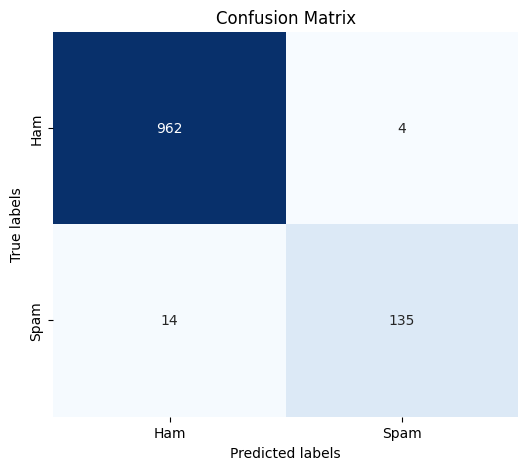

In [ ]:
# plotting the above confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix
conf_matrix = np.array([[962, 4],
                        [14, 135]])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


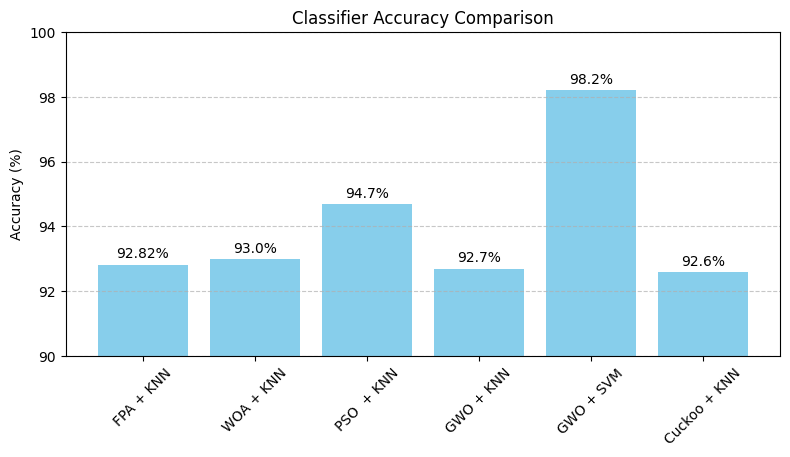

In [ ]:
import matplotlib.pyplot as plt

# Data
classifiers = ['FPA + KNN', 'WOA + KNN', 'PSO  + KNN', 'GWO + KNN', 'GWO + SVM', 'Cuckoo + KNN']
accuracies = [92.82, 93.00, 94.70, 92.70, 98.20, 92.60]

# Plot
plt.figure(figsize=(8, 4))
plt.bar(classifiers, accuracies, color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.ylim(90, 100)

# Annotate accuracy values
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.2, f'{value}%', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


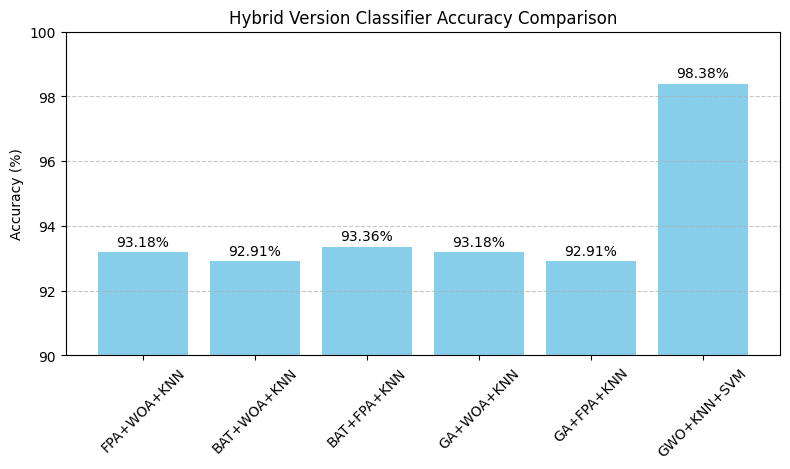

In [ ]:
import matplotlib.pyplot as plt

# Data
classifiers = ['FPA+WOA+KNN', 'BAT+WOA+KNN', 'BAT+FPA+KNN', 'GA+WOA+KNN', 'GA+FPA+KNN', 'GWO+KNN+SVM']
accuracies = [93.18, 92.91, 93.36, 93.18, 92.91, 98.38]

# Plot
plt.figure(figsize=(8, 4))
plt.bar(classifiers, accuracies, color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Hybrid Version Classifier Accuracy Comparison')
plt.ylim(90, 100)

# Annotate accuracy values
for index, value in enumerate(accuracies):
    plt.text(index, value + 0.2, f'{value}%', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
